<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-EDA" data-toc-modified-id="Загрузка-данных-и-EDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и EDA</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Построение-облака-слов-и-анализ-частот-наиболее-распространенных-слов" data-toc-modified-id="Построение-облака-слов-и-анализ-частот-наиболее-распространенных-слов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Построение облака слов и анализ частот наиболее распространенных слов</a></span></li><li><span><a href="#Выводы-разделу" data-toc-modified-id="Выводы-разделу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы разделу</a></span></li></ul></li><li><span><a href="#Обучение-и-тестирование-моделей" data-toc-modified-id="Обучение-и-тестирование-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-обучающих-и-тестовых-выборок" data-toc-modified-id="Подготовка-обучающих-и-тестовых-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка обучающих и тестовых выборок</a></span></li><li><span><a href="#Подбор-оптимальных-гиперпараметров-и-обучение-модели" data-toc-modified-id="Подбор-оптимальных-гиперпараметров-и-обучение-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подбор оптимальных гиперпараметров и обучение модели</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

Уважаемый ревьювер представляю на суд проект по классификации комментариев. Замечания и предложения по улучшению работы приветствуются. Сразу сообщу, что лемматизация текста идет от 17 до 20 минут, так что аккуратнее. Я применил две простые модели, с другими моделями время расчета было слишком большим, а иногда ядро платформы умирало, что очень расстраивало необходимостью новой операции лемматизации длительностью от 17 до 20 минут. Хотя на платформе colab таких глюков было меньше. Пока время есть хочу поделать данный проект с BERTом, но в зачет пойдет данный проект. Дисбаланс классов устранил настройкой гиперпараметров, сначала сделал через oversampling минорного класса, но у Яндекса ядро помирало слишком часто, поэтому только гиперпараметры.

# Проект  «Викишоп»

**<i>Цель: Разработать модель классифицирующую комментарии на позитивные и негативные. </i>**

**Описание:**

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

**Задачей проекта является:**
1. Выбрать модель классификации комментариев с качеством прогнозирования по метрике f1 не менее 0.75.

**Объектом исследования является датасет с комментариями с меткой принадлежности к позитивным или негативным.** 

**Проект выполняется в следующие этапы:**
1. Подготовка.
2. Обучение и тестирование моделей.
3. Общий вывод.

## Подготовка

### Загрузка данных и EDA

In [1]:
# код ревьюера
#!pip install wordcloud

In [2]:
!pip install wordcloud

     |████████████████████████████████| 458 kB 1.3 MB/s eta 0:00:01


In [3]:
# Импорт библиотек и методов
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import wordcloud
from pprint import pprint
from time import time
import logging
import warnings

#from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

from nltk.probability import FreqDist
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
#Загрузка данных
pth1 = '/datasets/toxic_comments.csv'
pth2 = '/content/drive/MyDrive/toxic/toxic_comments.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, dtype={'text':'object', 
                                  'toxic':'int8'
                                  })
    
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, dtype={'text':'object', 
                                  'toxic':'int8'
                                  })
else:
    print('Something is wrong, but sunshine so bright!')  


In [5]:
# Общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int8  
dtypes: int8(1), object(1)
memory usage: 1.4+ MB


In [6]:
# Первые пять строк датафрейма
df.sample(5)

,text,toxic
109716,Umm.... so you respond to censorship allegatio...,0
51661,"""\n\n notability and sourcing \nDear 74\n\ntha...",0
130528,Warning\n\nI am not breaking any tules. You ar...,0
132677,Get off my fucking back.. You God-damn little ...,1
43232,"oh dear god, how handsome is this man?? withou...",0


In [7]:
# Статистика датафрейма
df.describe(include='all')

,text,toxic
count,159571,159571.000000
unique,159571,NaN
top,Thanks Walter for your contact details I will ...,NaN
freq,1,NaN
mean,NaN,0.101679
std,NaN,0.302226
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


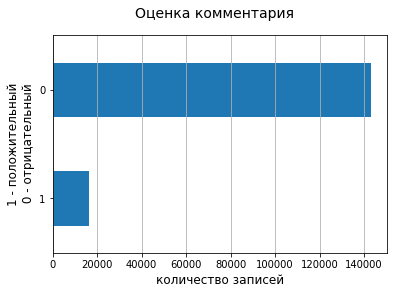

In [8]:
# Графическое представление распределение оценок
fig, ax = plt.subplots()
fig.suptitle('Оценка комментария', fontsize=14)
df['toxic'].reset_index().groupby('toxic').count().sort_values(by='index').plot(kind='barh', 
                                                                                legend=False, ax=ax)
plt.ylabel('1 - положительный\n 0 - отрицательный', fontsize=12)
plt.xlabel('количество записей', fontsize=12)
ax.grid(axis='x')
plt.show()

**Выводы:**

1. Явных пропусков данных нет.
2. Текст включает знаки препинания, прописные буквы, служебные символы.
3. Наблюдается несбалансированность классов, доля класса 1 - 10,16 %.

### Подготовка данных

In [9]:
# Функция очистки текста, от 
def clear_text(text):
    sub_text = re.sub(r'[^a-zA-Z]', ' ', text)
    return ' '.join(sub_text.split())

In [10]:
#Очистка текста
df['text_clear'] = df['text'].apply(clear_text)

In [11]:
# Функция определения части речи слова
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [12]:
#
df['text_clear'] = df['text_clear'].str.lower()

In [13]:
# Создание экземпляра класса лемматизатора
lemmatizer = WordNetLemmatizer()

In [14]:
# Объявление списка стоп слов для английского языка
stopwords_english = set(stopwords.words('english'))

In [15]:
# Функция лемматизации предложения
def lemmatize(text):
    word_list = nltk.word_tokenize(text)
    word_list_without_stop_words = [word for word in word_list if not word in stopwords_english]
    return ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list_without_stop_words]) 

In [16]:
%%time 

# Лемматизация текста
df['lemma'] = df['text_clear'].apply(lemmatize)

CPU times: user 11min 8s, sys: 59.5 s, total: 12min 8s
Wall time: 12min 12s


Дубль вывода для информации
CPU times: user 10min 47s, sys: 51 s, total: 11min 38s
Wall time: 11min 39s

In [17]:
# Случайные пять строк датафрейма
df.sample(5)

,text,toxic,text_clear,lemma
98728,Mathematicians hired to monitor transactions \...,0,mathematicians hired to monitor transactions i...,mathematician hire monitor transaction remove ...
78045,Much appreciated. Thank you ),0,much appreciated thank you,much appreciate thank
29064,"""\n\nAgain, not that natal women have the same...",0,again not that natal women have the same hiv r...,natal woman hiv risk tg t woman rather total n...
61128,"""\n (cur) (last) 17:00, 27 June 2006 MatthewF...",0,cur last june matthewfenton talk contribs rv n...,cur last june matthewfenton talk contribs rv n...
156434,More important to follow the rules. When I get...,0,more important to follow the rules when i get ...,important follow rule get paid full time edit ...


### Построение облака слов и анализ частот наиболее распространенных слов

In [18]:
# Записи отмеченные как положительные и негативные
string_positive = pd.Series(df[df['toxic'] == 0]['lemma']).str.cat(sep=' ')
string_negative = pd.Series(df[df['toxic'] == 1]['lemma']).str.cat(sep=' ')
#string = pd.Series(df['lemma']).str.cat(sep=' ')

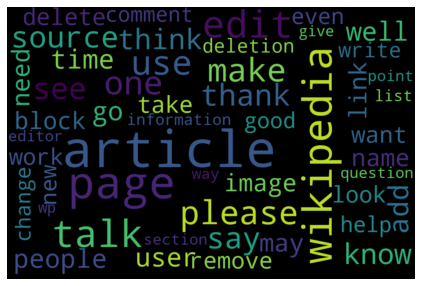

In [19]:
# Облако наиболее 50 наиболее распространенных положительных слов
wordcloud_positive = WordCloud(width=1200, height=800, 
                               max_font_size=150, max_words=50, 
                               collocations=False, 
                               background_color='black').generate(string_positive)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

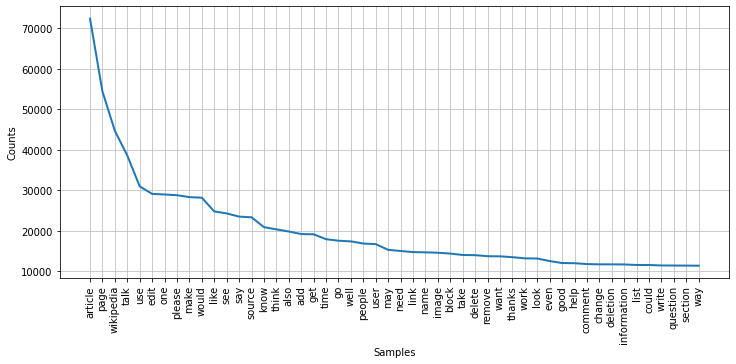

In [20]:
# Количество появлений 50 наиболее распространенных положительных слов
fdist_positive = FreqDist()
for word in word_tokenize(string_positive):
    fdist_positive[word] += 1
plt.figure(figsize=(12, 5))
fdist_positive.plot(50, cumulative=False)
plt.show()

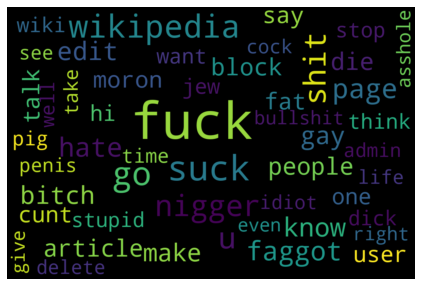

In [21]:
# Облако наиболее 50 наиболее распространенных негативных слов
wordcloud_negative = WordCloud(width=1200, height=800, 
                               max_font_size=150, max_words=50, 
                               collocations=False, 
                               background_color='black').generate(string_negative)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

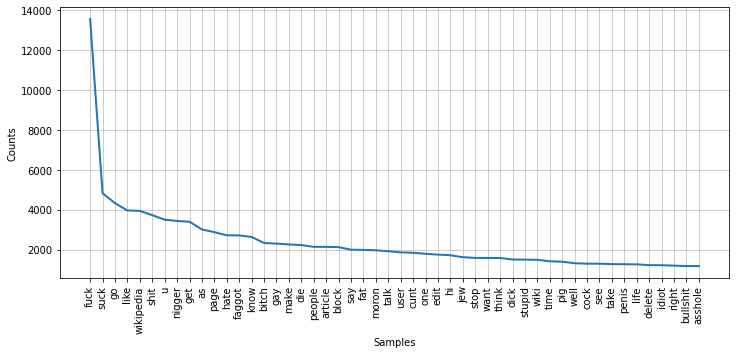

In [22]:
# Количество появлений 50 наиболее распространенных негативных слов
fdist_negative = FreqDist()
for word in word_tokenize(string_negative):
    fdist_negative[word] += 1
plt.figure(figsize=(12, 5))
fdist_negative.plot(50,cumulative=False)
plt.show()

**Выводы:**

1. Проведена очистка данных с помощью использования регулярных выражений
2. Слова приведены к нижнему регистру.
3. Проведена лемматизация данных с учетом части речи слова.

### Выводы разделу

1. Проведен обзор исходных данных и определены пути и методы подготовки данных.
2. Подготовлены данные для классификации.

## Обучение и тестирование моделей

### Подготовка обучающих и тестовых выборок

In [23]:
# Выделение выборок признаков модели и целевого признака
features = df['lemma']
target = df['toxic']

In [24]:
# Разделение выборок на тренировочные и тестовые
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target,
                                                                            stratify=target,
                                                                            test_size=0.25, 
                                                                            random_state=12)

In [25]:
print(f'Размер обучающей выборки: {features_train.shape}')
print(f'Размер целевой выборки: {target_train.shape}')

Размер обучающей выборки: (119678,)
Размер целевой выборки: (119678,)


**Выводы:**

1. Произведена подготовка обучающих и тестовых выборок, со стратифицированным целевым признаком.

### Подбор оптимальных гиперпараметров и обучение модели

In [26]:
# Создание Pipeline из трех экземпляров классов
pipe = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("classifier", SGDClassifier()),
    ]
)

In [27]:
# Задание сетки гиперпараметров 
param_grid = [{
    'classifier': [SGDClassifier()],
    #"vect__max_df": (0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    # "sgdc__max_iter": (20,),
    "classifier__alpha": (0.00001, 0.000001),
    # "classifier__penalty": ("l2", "elasticnet"),
    # 'classifier__max_iter': (10, 50, 80),
    'classifier__class_weight':['balanced'],
    'classifier__n_jobs':(-1,)
},
    {
    'classifier': [KNeighborsClassifier()],
    #"vect__max_df": (0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    # "lr__max_iter": (20,),
    "classifier__n_neighbors": (5, 10),
    #"classifier__learning_rate": (0.1, 1),
    'classifier__n_jobs':(-1,)
}]

In [28]:
# Создание конструкции поиска оптимильной модели с настроенными гиперпараметрами
grid_search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=1, scoring='f1', cv=5)

In [29]:
# Поиск оптимильной модели с настроенными гиперпараметрами и вывод метрики f1
print("Performing grid search for model: ")
print("pipeline:", [name for name, _ in pipe.steps])
print("parameters:")
pprint(param_grid)
t0 = time()
grid_search.fit(features_train, target_train)
print("done in %0.3fs" % (time() - t0))

Performing grid search for model: 
pipeline: ['vect', 'tfidf', 'classifier']
parameters:
[{'classifier': [SGDClassifier()],
  'classifier__alpha': (1e-05, 1e-06),
  'classifier__class_weight': ['balanced'],
  'classifier__n_jobs': (-1,),
  'vect__ngram_range': ((1, 1), (1, 2))},
 {'classifier': [KNeighborsClassifier()],
  'classifier__n_jobs': (-1,),
  'classifier__n_neighbors': (5, 10),
  'vect__ngram_range': ((1, 1), (1, 2))}]
Fitting 5 folds for each of 8 candidates, totalling 40 fits
done in 2214.907s


Performing grid search for model: 
pipeline: ['vect', 'tfidf', 'classifier']
parameters:
[{'classifier': [SGDClassifier()],
  'classifier__alpha': (1e-05, 1e-06),
  'classifier__class_weight': ['balanced'],
  'classifier__n_jobs': (-1,),
  'vect__ngram_range': ((1, 1), (1, 2))},
 {'classifier': [KNeighborsClassifier()],
  'classifier__n_jobs': (-1,),
  'classifier__n_neighbors': (5, 10),
  'vect__ngram_range': ((1, 1), (1, 2))}]
Fitting 5 folds for each of 8 candidates, totalling 40 fits
done in 2214.473s

In [30]:
# Вывод структуры pipeline и параметров лучшей модели
print('Структура и параметры лучшей модели:')
print(grid_search.best_estimator_)
print("Best f1-score: %0.3f" % grid_search.best_score_)

Структура и параметры лучшей модели:
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 SGDClassifier(alpha=1e-05, class_weight='balanced',
                               n_jobs=-1))])
Best f1-score: 0.790


**Выводы:**

1. В качестве лучшей модели выбрана модель SGDClassifier с метрикой f1 равной: 0.79

### Тестирование модели

In [31]:
# Создание экземпляра лучшей модели
best_model = grid_search.best_estimator_.fit(features_train, target_train)
best_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 SGDClassifier(alpha=1e-05, class_weight='balanced',
                               n_jobs=-1))])

In [32]:
# Расчет метрики f1 на тестовой выборке для лучшей модели
print("Метрика f1 на тестовой выборке: {:.2f}".format(f1_score(target_test, 
                                                             best_model.predict(features_test))))

Метрика f1 на тестовой выборке: 0.79


In [33]:
# Отчет о точности и полноте предсказания модели
print('Отчет о точности предсказания по тестовой выборки для модели SGDClassifier():')
print(classification_report(target_test, best_model.predict(features_test)))

Отчет о точности предсказания по тестовой выборки для модели SGDClassifier():
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     35837
           1       0.78      0.80      0.79      4056

    accuracy                           0.96     39893
   macro avg       0.88      0.89      0.88     39893
weighted avg       0.96      0.96      0.96     39893



**Выводы:**

1. Качество предсказания модели SGDClassifier на тестовых данных соответствует требованиям заказчика метрика f1 равна: 0.79.
2. Модель SGDClassifier можно охарактеризовать достаточной точностью (0.78) и полнотой (0.80) определения негативных комментариев.

**Выводы по разделу 2:**

1. Из двух моделей классификации KNeighborsClassifier и SGDClassifier, лучшей была выбрана SGDClassifier с метрикой f1 на обучающих данных равной 0.789, далее на тестовой выборке значение метрики составило 0.79, что говорит, о том, что модель не переобучилась, размер обучающей выборки обеспечил качественное обучение модели.

## Выводы

1. В ходе предварительного анализа данных было проведено:
- очистка текста с помощью регулярных выражений, удалены стоп- слова и приведено написание к нижнему регистру;
- проведен анализ распространенности основных слов для комментариев с положительной и негативной оценкой;
2. Методом сеточного поиска оптимизированы и выбрана лучшая модель среди KNeighborsClassifier и SGDClassifier для классификации комментариев по их оценке. Модель SGDClassifier выбрана лучшей, метрика f1 составила:
- на обучающих выборках - 0.789;
- на тестовых выборках - 0.79.
3. Для классификации комментариев на положительные и негативные предпочтительно использовать модель SGDClassifier.